**Importing libraries and loading data set**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


**Checking basic details of given data**

In [3]:
print(data.info(),'\n')
print(data.isna().sum(),'\n')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None 

Year     0
Price    0
dtype: int64 

              Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000


In [4]:
print('Unique "Year" values: ', data['Year'].unique(),'\n')
print('Unique "Price" values: ',data['Price'].unique())

Unique "Year" values:  [2018 2019 2015 2016 2017 2020 2013 2014] 

Unique "Price" values:  [465000 755000 700000 350000 425000 575000 509999 500000 600000 475000
 550000 434999 650000 450000 486000 545000 525000 396000 325000 345000
 341000 490000 540000 595000 495000 400000 300000 320000 409999 390000
 480000 520000 640000 375000 420000]


By looking at the dataset, some duplicate rows are noticed.
But we can see that the table is randomly generated by taking combination of a set of year-price values, thus we are ignoring duplicate rows and leave them as such in our data set.

**Data visualization**

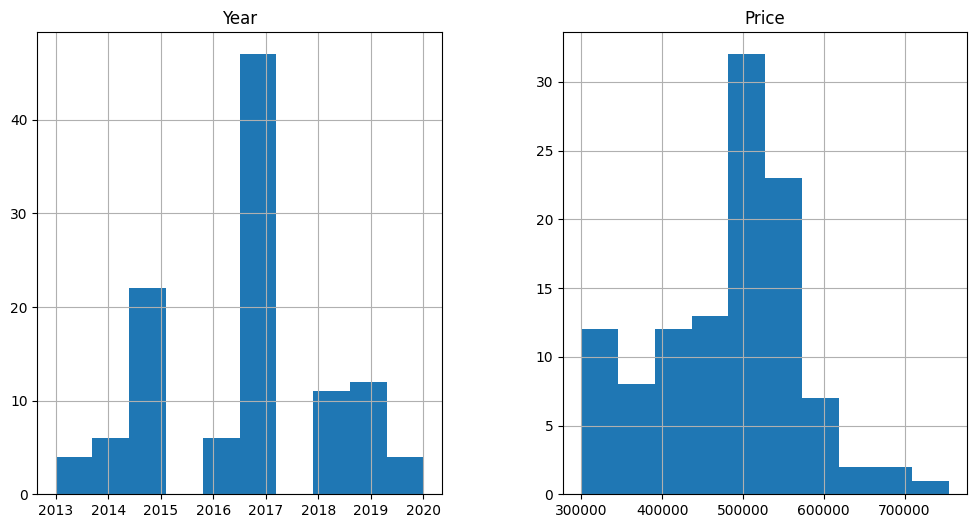

In [5]:
freq_data = data.select_dtypes(['float64','int64','int32'])
freq_data.hist(figsize = (12,6))
plt.show()

**Outlier handling**

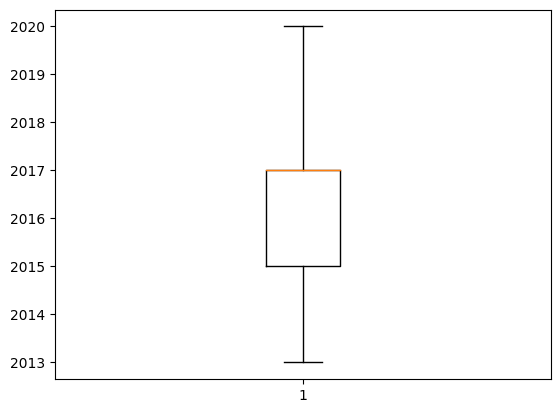

In [6]:
#checking outliers in independent feature only
plt.boxplot(data['Year'])
plt.show()

#no outliers found

**Finding correlation**

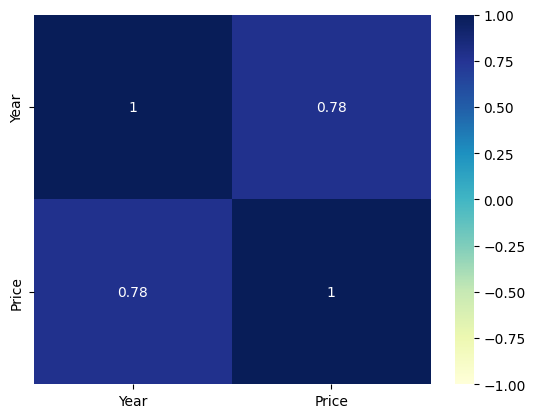

In [7]:
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'YlGnBu')
plt.show()

We can see that there is high correlation between Year and Price

**Regression models**

Linear Regression

In [20]:
#Splitting dependent and independent features

y_data = data['Price']
x_data = data.drop(['Price'], axis = 1)

In [21]:
#splitting to train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size = .25)

In [22]:
#fitting train sets into linear regression model

from sklearn import linear_model
lm = linear_model.LinearRegression()
x_train = x_train.values
lm_model = lm.fit(x_train, y_train)

#doing prediction on 2022 model
pred_lm = lm_model.predict([[2022]])
print('Predicted value for 2022 model i10 (by linear regression): \033[1m', pred_lm[0])


Predicted value for 2022 model i10 (by linear regression):  740160.1193776578


Lasso Regression

In [23]:
#fitting train sets into lasso regression model

from sklearn.linear_model import Lasso
ls = Lasso(alpha=1.0)
ls_model = ls.fit(x_train, y_train)

#doing prediction on 2022 model
pred_ls = ls_model.predict([[2022]])
print('Predicted value for 2022 model i10 (by lasso regression): \033[1m', pred_ls[0])


Predicted value for 2022 model i10 (by lasso regression):  740157.9570014179


Using **MAPE** for calculating model goodness as MSE showed a very high value

**Reason:** MSE is scale-dependent, MAPE is not. So if you are comparing accuracy across time series with different scales, you can use MAPE. MAPE is often preferred because it is easy to understand percentages better than squared errors.

In [24]:
#to check goodness of each model using MAPE

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE of linear model is: ', 100*mean_absolute_percentage_error(y_test, lm_model.predict(x_test.values)),'%')
print('MAPE of lasso model is: ', 100*mean_absolute_percentage_error(y_test, ls_model.predict(x_test.values)),'%')

print('\n\033[1mNote: A MAPE value of <10% indicates high accurate prediction, 10% ≤ MAPE <20% indicates good prediction')

MAPE of linear model is:  11.358598198164696 %
MAPE of lasso model is:  11.358527503340579 %

Note: A MAPE value of <10% indicates high accurate prediction, 10% ≤ MAPE <20% indicates good prediction


Getting error% after scaling the x values (independent features)

In [25]:
#standard scaling x_train and x_test sets

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [26]:
#model fitting and prediction

#linear model
lm_model_scaled = lm.fit(x_train_scaled, y_train)
pred_lm_scaled = lm_model_scaled.predict(x_test_scaled)

#lasso model
ls_model_scaled = ls.fit(x_train_scaled, y_train)
pred_ls_scaled = ls_model_scaled.predict(x_test_scaled)

In [27]:
#to check goodness of each model using MAPE

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE of linear model is: ', 100*mean_absolute_percentage_error(y_test, pred_lm_scaled),'%')
print('MAPE of lasso model is: ', 100*mean_absolute_percentage_error(y_test, pred_ls_scaled),'%')

print('\n\033[1mNote: A MAPE value of <10% indicates high accurate prediction, 10% ≤ MAPE <20% indicates good prediction')

MAPE of linear model is:  10.915761138466337 %
MAPE of lasso model is:  10.915694155960102 %

Note: A MAPE value of <10% indicates high accurate prediction, 10% ≤ MAPE <20% indicates good prediction


***Inference:***

We can see that the mean absolute percentage error (MAPE) is slightly less for LASSO regression which makes it better than linear model for a small data set.
The main goal of using LASSO regression is to find the subset of predictors that minimizes the prediction error in the linear regression models.

**Note**: It's also noted that scaling helps in furthur reduction of the error percentage